## Introduction

#### The following is the implementation of Single Layer Neural Network. For assignment purpose, the implementation is divided into 3 parts. 
- Part 1 : Design of Neural Network with proper implementation of forward and backward propagation.
- Part 2 : Neural network to read small dataset, train on the network and test on the validation set.
- Part 3 : Neural network to read big CIFAR dataset , train on the part 1 network, and give the classification of "Bird and Automobile"

## Part 1

### The following is the neural network implemented with one hidden layer and one output layer. The hyperparameters i.e the learning rate, the number of epochs or iterations, number of hidden node can be adjusted as per our need.  

- The algorithm forms the model across two major methods. Propagation of feeding and back. Feed-forward forecast the performance of the provided data by changing weights and back-propagation trains the model. It is therefore necessary to first start the weights[1].
- A good set of weights would definitely quickly lead to a local minima. In comparison to the sluggish accomplishment of local minima, often poor weights may never accumulate. Original weights should be numbered randomly to split the symmetry. The values must never be null but closer to zero, so the output doesn't rise. And both positive and negative values are better, so that the direction differs apart from magnitude. Go therefore with normal distribution. It's all right to start bias vectors to zero [1].

##### Activation Function
- We are using sigmoid function as our activation function, which indeed follows up in feed forward propagation and derivative of sigmoid in back propagation.

##### Forward Propagation
- It computes all the inputs, weights and bias  (input * weights + bias) computes the sigmoid activation function z. It outputs the value A. This output is carried on to next layer. After computing the A for the output layer, that A is the output of the neural network [1].  

##### Back Propagation
- Backprop essentially measures the loss of feed-forward production and the true value. This error is propagated in every layer back to all weight matrices and is modified by the statistical gradient [1].

In [1]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_deravative(z):
    return z * (1 - z)

In [2]:
def Error_found(true_values, predicted):
    result = true_values - predicted
    #print("Error: \n", np.mean(np.abs(result)))
    return result

In [3]:
class NeuralNetwork_model:
    def __init__(self, X,y,lr,hiddenlayer):
        self.X = X
        self.y = y
        hiddenlayer = 4
        self.lr = 0.001
        x_shape = X.shape[1]
        self.w1 = np.random.randn(x_shape, hiddenlayer)  #(4*350) (350*4) matrices
        self.b1 = np.random.randn(hiddenlayer) #(4*1)
        self.w2 = np.random.randn(hiddenlayer, 1) #(350*4)
        self.b2 = np.random.randn(1)
        
    def forward_propagation(self, X):
        self.X = X
        Z_1 = np.dot(self.X, self.w1) + self.b1 
        self.A1 = sigmoid(Z_1) # output of hidden-layer
        Z_2 = np.dot(self.A1, self.w2) + self.b2
        self.A2 = sigmoid(Z_2) #  output of output-layer
        return self.A2
        
    def backward_propagation(self):        
        #Computing first the output layer
        dA2 = Error_found(self.y, self.A2) 
        der_output = sigmoid_deravative(self.A2)
        output_lambda = dA2 * der_output
        
        weight_change = np.dot(self.A1.T, output_lambda)
        self.w2 = self.w2 + (self.lr * weight_change)
        
        #Computing hidden layer
        der_hidden = sigmoid_deravative(self.A1)
        hidden_lambda = np.dot(output_lambda, self.w2.T) * der_hidden
        weight_hidden_change = np.dot(self.X.T, hidden_lambda)
        self.w1 = self.w1 + (self.lr * weight_hidden_change)
    # Prediction function    
    def predicted(self,x_test):
        prediction= self.forward_propagation(x_test)
        return prediction  

## Part 2

### We imported the small circle dataset, which had non linear data and feeded this data into the above model. 

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv("circles500.csv")
X = dataset.drop(columns = ['Class']).values
y = dataset.drop(columns = ['X0', 'X1']).values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [6]:
model_1 = NeuralNetwork_model(x_train, y_train,lr= 0.001, hiddenlayer=4)
iteration = 20000
for x in range(iteration):
    model_1.forward_propagation(x_train)
    model_1.backward_propagation()
def prediction(x_test):
    pred = model_1.predicted(x_test)
    result =[]
    for i in pred:
        if i >= 0.5:
            result.append(1)
        elif i < 0.5:
            result.append(0)
    result = np.array(result)
    return result

In [7]:
from sklearn.metrics import accuracy_score

print("Training set Accuracy: ",accuracy_score(y_train, prediction(x_train)))
print("Test set Accuracy: ",accuracy_score(y_test, prediction(x_test)))

Training set Accuracy:  0.9771428571428571
Test set Accuracy:  0.94


In [8]:
#Confusion matrix for main model

#SOURCE: Code taken from self assignment (Machine Learning - Assignment 2)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  

matrix3 = confusion_matrix(y_test, prediction(x_test))  
  
#heatmap  
plot1 = sns.heatmap(matrix3,annot=True,cbar=False)  
plt.ylabel('Predicted Value')  
plt.xlabel('True Value')  
plt.title('Confusion Matrix')  
plt.show()

<Figure size 640x480 with 1 Axes>

## Observations on the outcome:

* Data is divided into train and test at a ratio of 70:30
* Model is trained with 20000 epochs with a learning rate of 0.001
* The neural net sucessfully predicted the two classes assigned to the group (0 & 1)
* Total accuracy of 97% is seen on the train data and 94% is seen on the test data. As there is no huge
  difference between the accuracies of train and test data we could confirm that the data is not overfitting the model
  and it is a near good fit model.
* The model runs fast even when the epoch size is more.
* From the confusion matrix we can draw that the number of False negatives is very less and False positives is a little
  more
* Higher number of values are predicted to be true positive or negative, hence increaseing the performance of the model


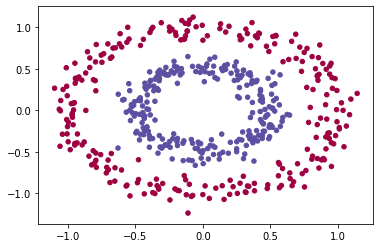

In [10]:
import matplotlib.pyplot as plt
X1 = dataset.drop(columns = ['X1', 'Class']).values
X2 = dataset.drop(columns = ['X0', 'Class']).values
y1 = dataset.drop(columns = ['X0', 'X1']).values
plt.scatter(X1, X2, c=y, s=20, cmap=plt.cm.Spectral);

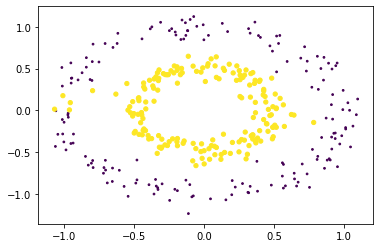

In [11]:
plt.scatter(x_train[:,0], x_train[:,1], c=prediction(x_train), s=15*(np.abs(prediction(x_train)-y_train)+.2))
plt.show()

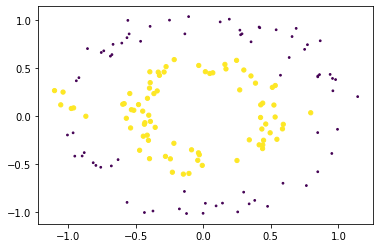

In [12]:
plt.scatter(x_test[:,0], x_test[:,1], c=prediction(x_test), s=15*(np.abs(prediction(x_test)-y_test)+.2))
plt.show()

## Part 3

In [13]:
#Importing necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#SOURCE: loading code taken from "code_snippets" provided by Michael.Madden
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

batch1 = loadbatch('data_batch_2')

#Loads the data(features)
data = batch1[b'data']
#Loads the target variables
labels = batch1[b'labels']

#Converting to GreyScale
Features = np.mean(data, axis=1)

df = pd.DataFrame({'X':Features, 'Y': labels})

indexNames = df[ (df['Y'] != 1) & (df['Y'] != 0) ].index #Filtering only bird and auto-mobile class
df.drop(indexNames , inplace=True)

XX = df.drop(['Y'], axis=1).values
YY = df.drop(['X'], axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.3)

ss = StandardScaler() #normalize the data  

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
model_2 = NeuralNetwork_model(X_train, Y_train,lr= 0.001, hiddenlayer=6)
iteration = 20000
for x in range(iteration):
    model_2.forward_propagation(X_train)
    model_2.backward_propagation()
    
pred = model_2.predicted(X_test)

result1 = []
for i in pred:
    if i >= 0.5:
        result1.append(1)
    elif i < 0.5:
        result1.append(0)
Accuracy = accuracy_score(Y_test, result1)
print("Accuracy :", Accuracy * 100)

Accuracy : 69.23076923076923


### Observations on the outcome:

* Model is trained with 20000 epochs with a learning rate of 0.001
* The neural net sucessfully predicted the two classes assigned to the group (bird & automobile)
* Total accuracy of 68% is seen on the test data
* From the confusion matrix plotted, we could analyze that the total number of 
  true positives : 1.9e+02
  False positives : 1.2e+02
  False negatives : 76
  true negatives : 2.2e+02
* A critique to the system would be, many classes are predicted positve when they are actually negative
* This can be solved by training the model with more data and by removing the noise from the dataset 


## References
- [1] https://towardsdatascience.com/understanding-neural-networks-what-how-and-why-18ec703ebd31
- [2] Andrew Ng- DeepLearning youtube. 